# Pre-stage work

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import missingno as msno
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir('../titanic (1)/'))

['test.csv', 'train.csv', '.ipynb_checkpoints', 'note_1.ipynb', 'gender_submission.csv']


In [3]:
from subprocess import check_output
print(check_output(['ls', '../titanic (1)']).decode('utf8'))

gender_submission.csv
note_1.ipynb
test.csv
train.csv



## Loading Datasets

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# train.profile_report()

In [6]:
test.profile_report()

In [7]:
print(f'Shape of train dataset is {train.shape}')
print(train.info(), end='\n')
print(f'Shape of train dataset is {test.shape}')
test.info()

Shape of train dataset is (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Shape of train dataset is (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-nu

In [8]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
38,930,3,"Sap, Mr. Julius",male,25.0,0,0,345768,9.5000,NaN,S
232,1124,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,NaN,S
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,17475,26.5500,NaN,S
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S


# Overview and Cleaning Data

## Overview

In [9]:
passengerid = test.PassengerId
# train.drop(['PassengerId'], axis=1, inplace=True)
# test.drop(['PassengerId'], axis=1, inplace=True)

### Visualising Missing Values

In [10]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [11]:
plt.style.use('fivethirtyeight')

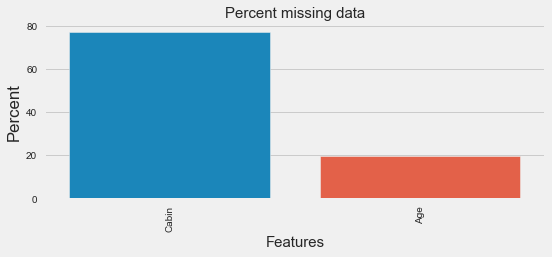

In [12]:
values = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
filtered_df = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
filtered_df = filtered_df[filtered_df.Percent >= 5]

fix, ax = plt.subplots(figsize=(8,3))
sns.barplot(x=filtered_df.index, y=filtered_df.Percent)
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent')
plt.title('Percent missing data', fontsize=15)
plt.show()

### Making a function for missing values

In [13]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [14]:
def missing_zero_values_table(df):
    zero_val = (df==0).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    percent = 100 * mis_val/len(df)
    mz_table = pd.concat([zero_val, mis_val, percent], axis=1)
    mz_table = mz_table.rename(columns={0:'Zero values', 1:'Missing Values', 2:'% of missing values'})
    mz_table['Data types'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values(by='% of missing values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    return mz_table

In [15]:
missing_zero_values_table(test)

Your selected dataframe has 11 columns and 418 Rows.
There are 3 columns that have missing values.


,Zero values,Missing Values,% of missing values,Data types
Cabin,0,327,78.2,object
Age,0,86,20.6,float64
Fare,2,1,0.2,float64


Text(0.5, 1.0, 'Test Set')

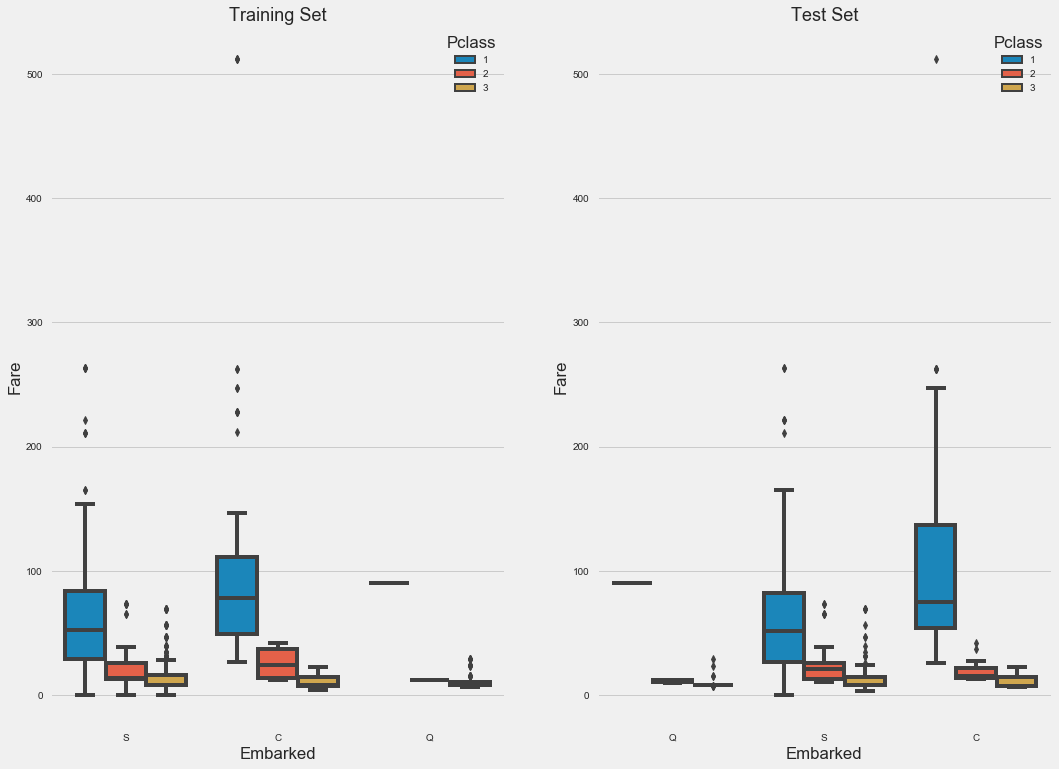

In [16]:
fig, ax = plt.subplots(figsize=(16,12), ncols=2)
ax1 = sns.boxplot('Embarked', 'Fare', hue='Pclass', data=train, ax=ax[0])
ax2 = sns.boxplot('Embarked', 'Fare', hue='Pclass', data=test, ax=ax[1])
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

In [17]:
survivors = train.Survived

train.drop(['Survived'], axis=1, inplace=True)
all_data = pd.concat([train, test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna('N', inplace=True)

In [18]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [19]:
all_data.groupby('Cabin')['Fare'].mean().sort_values(ascending=False)

Cabin
B    122.383078
C    107.926598
E     54.564634
D     53.007339
A     41.244314
T     35.500000
N     19.132707
F     18.079367
G     14.205000
Name: Fare, dtype: float64

In [20]:
def cabin_estimator(i):
    """Grouping cabin feature by the first letter"""
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [21]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [22]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

all_data = pd.concat([with_N, without_N], axis=0)

# PassengerId helps us separate train and test.
all_data.sort_values('PassengerId', inplace=True)

# Separating train and test from all_data
train = all_data[:891]
test = all_data[891:]

# adding saved target variable with train
train['Survived'] = survivors

In [23]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [24]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

# Visualization and Feature Relations

In [25]:
# Assumptions:

# Gender: More female survived than male
# Pclass: Higher socio-economic status passenger survived more than others.
# Age: Younger passenger survived more than other passengers.
# Fare: Passenger with higher fare survived more that other passengers. This can be quite correlated with Pclass.

Text(0.5, 0, 'Sex')

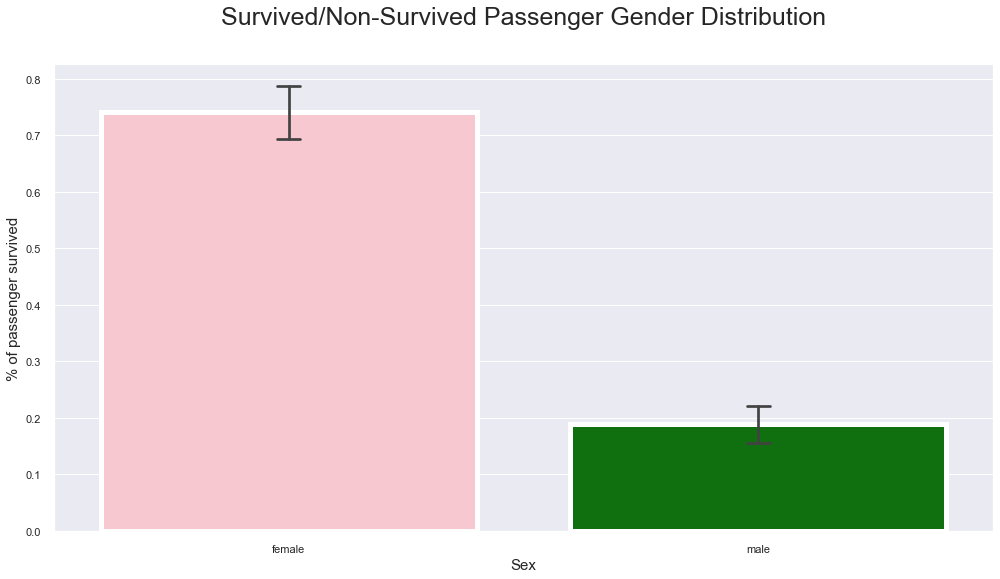

In [26]:
pal = {'male':'green', 'female': 'Pink'}
sns.set(style='darkgrid')
plt.subplots(figsize = (15, 8))
ax = sns.barplot(x='Sex',
                y='Survived', 
                data=train,
                palette=pal,
                linewidth=5,
                order=['female', 'male'],
                capsize=0.05,)

plt.title('Survived/Non-Survived Passenger Gender Distribution', fontsize=25, loc='center', pad=40)
plt.ylabel('% of passenger survived', fontsize=15,)
plt.xlabel('Sex', fontsize=15)

In [27]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


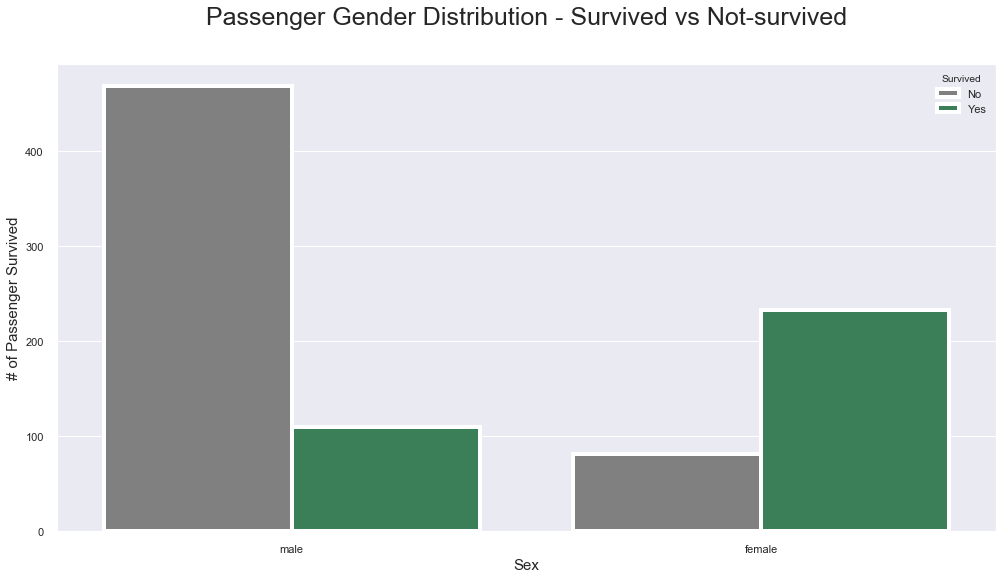

In [28]:
pal = {1:'seagreen', 0:'gray'}
sns.set(style='darkgrid')
plt.subplots(figsize=(15,8))
ax = sns.countplot(x='Sex',
                  hue='Survived',
                  data=train,
                  linewidth=4,
                  palette=pal)

# Fixing title, xlabel and ylabel
plt.title('Passenger Gender Distribution - Survived vs Not-survived', fontsize=25, pad=40)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('# of Passenger Survived', fontsize=15)

# Fixing xticks
# labels = ['Female', 'Male']
# plt.xticks(sorted(train.Sex.unique()), labels)

# Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')
plt.show()


Summary 
-------
--------------

* As we suspected, female passengers have survived at a much better rate than male passengers.
* It seems about right since females and children were the priority.

### Pclass and Survived

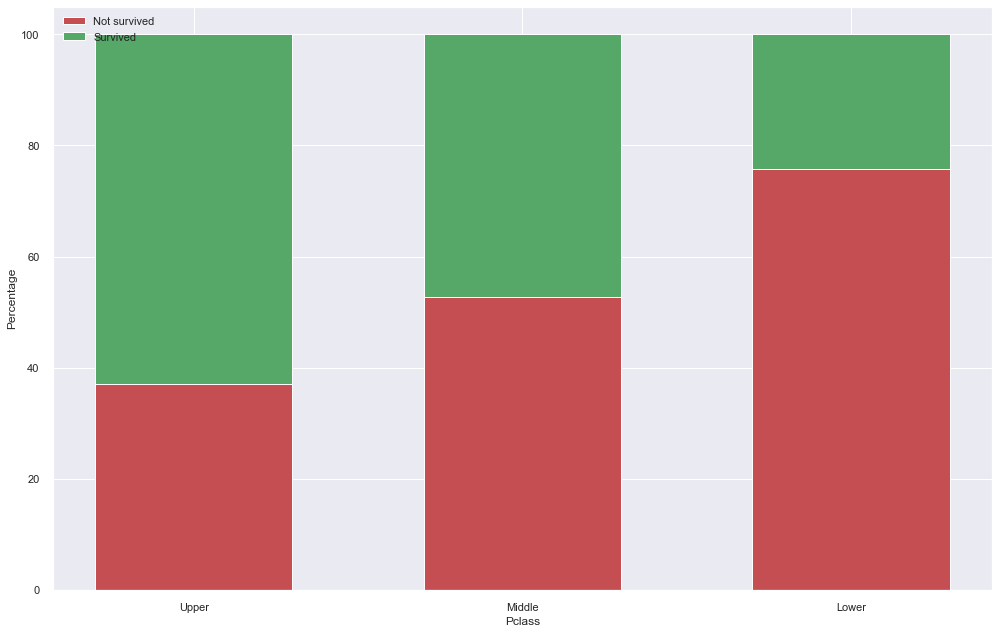

In [29]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass', columns = 'Survived')

names=['No', 'Yes']
temp_df.columns = names

r = [0, 1, 2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i/j*100 for i, j in zip(temp_df['No'], totals)]
Yes_s = [i/j*100 for i, j in zip(temp_df['Yes'], totals)]

#Plotting

plt.subplots(figsize=(15,10))
bar_Width = 0.6
names = ('Upper', 'Middle', 'Lower')

# Create Bar
x = plt.bar(r, No_s, color='r', edgecolor='white', width=bar_Width)

# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='g', edgecolor='white', width=bar_Width)

# Custom x axis
plt.xticks(r, names)
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.legend(x, labels=('Not survived', 'Survived'), loc=2)

plt.show()


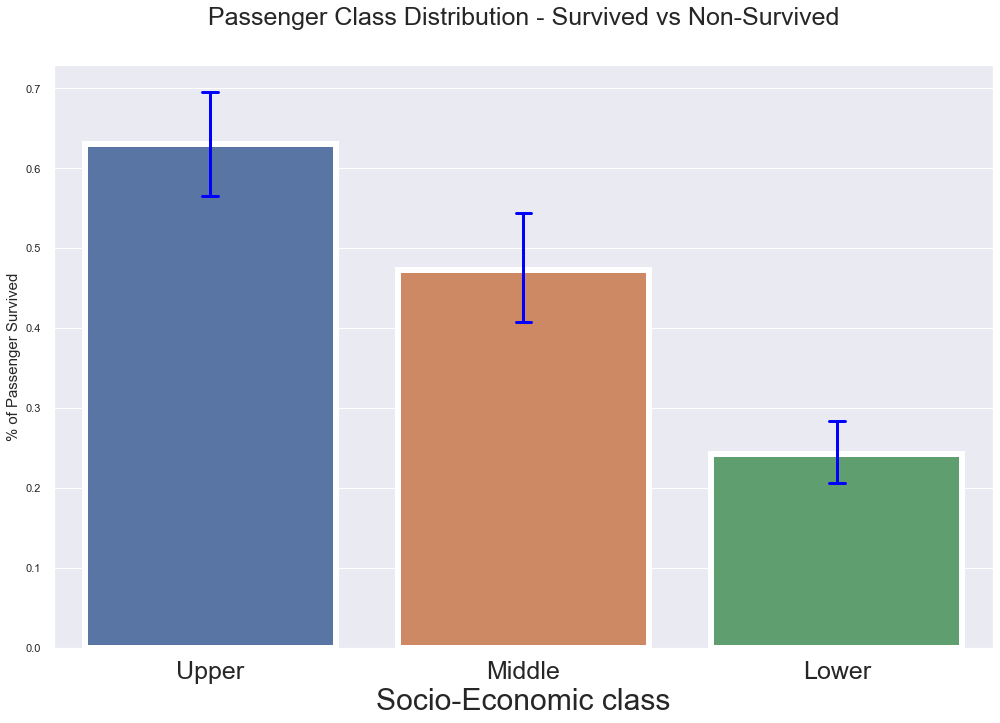

In [30]:
plt.subplots(figsize=(15,10))
sns.barplot(x='Pclass',
           y='Survived',
           data=train,
           linewidth=6,
           capsize=.05,
           errcolor='blue',
           errwidth=3)

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize=25, pad=40)
plt.xlabel('Socio-Economic class', fontsize=30)
plt.ylabel('% of Passenger Survived', fontsize=15)
names = ['Upper', 'Middle', 'Lower']
val = [0, 1, 2]

plt.xticks(val, names, fontsize=25)
plt.show()

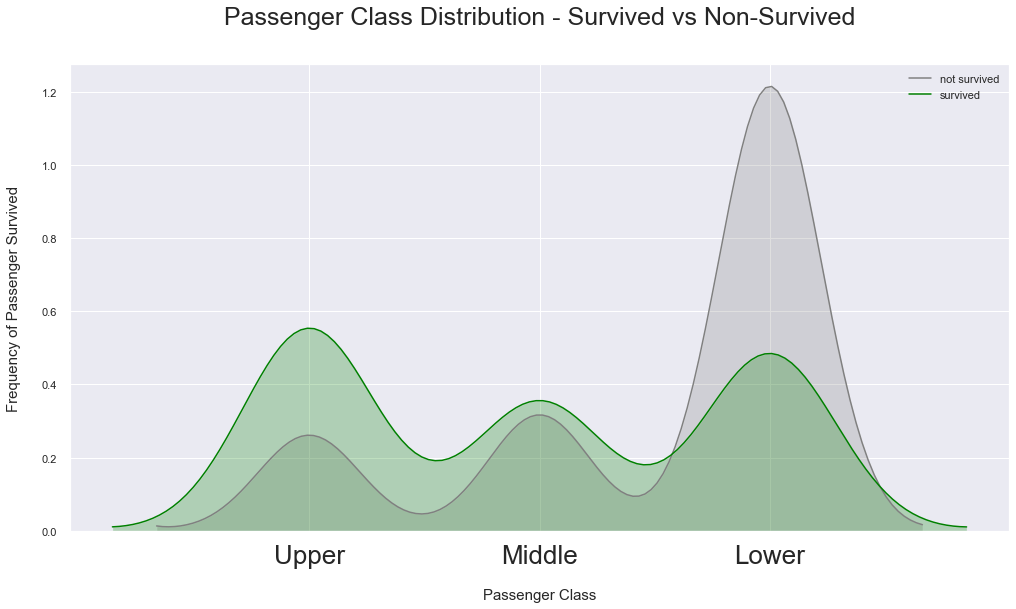

In [31]:
# Kernel Density Plot

fig = plt.figure(figsize=(15,8))

ax = sns.kdeplot(train.Pclass[train.Survived == 0],
                color='gray',
                shade=True,
                label='not survived',
                )
ax = sns.kdeplot(train.loc[train.Survived ==1, 'Pclass'],
                color='green',
                shade=True,
                label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel('Frequency of Passenger Survived', fontsize=15, labelpad=20)
plt.xlabel('Passenger Class', fontsize=15, labelpad=20)

labels=['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels, fontsize=26)
plt.show()

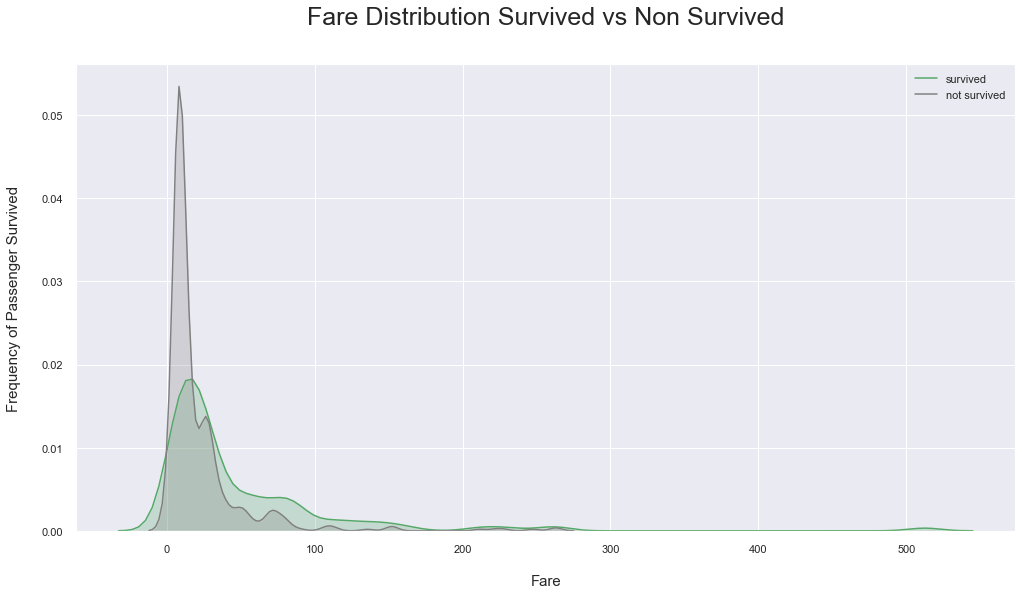

In [32]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

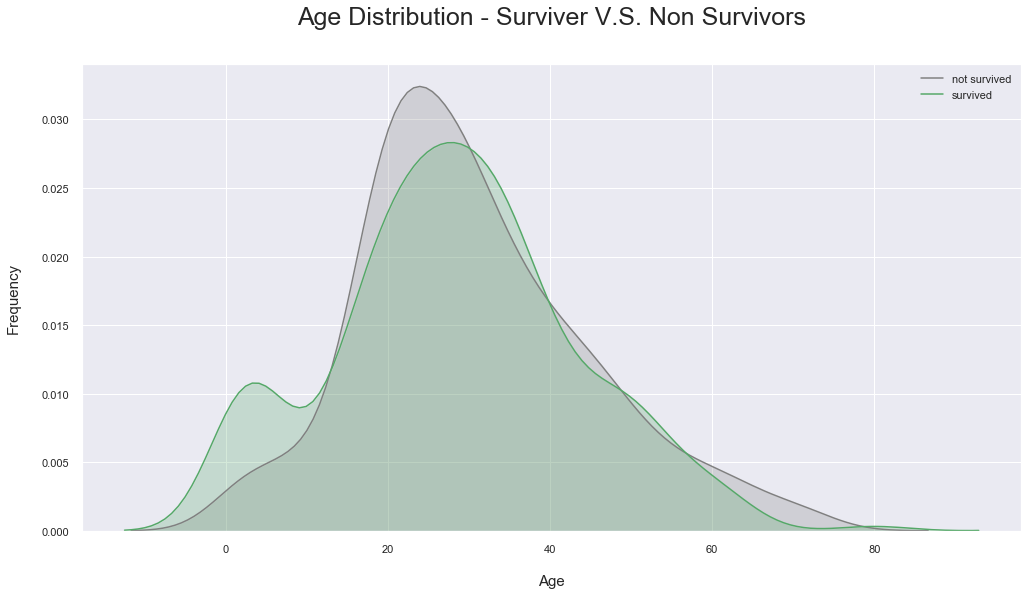

In [33]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

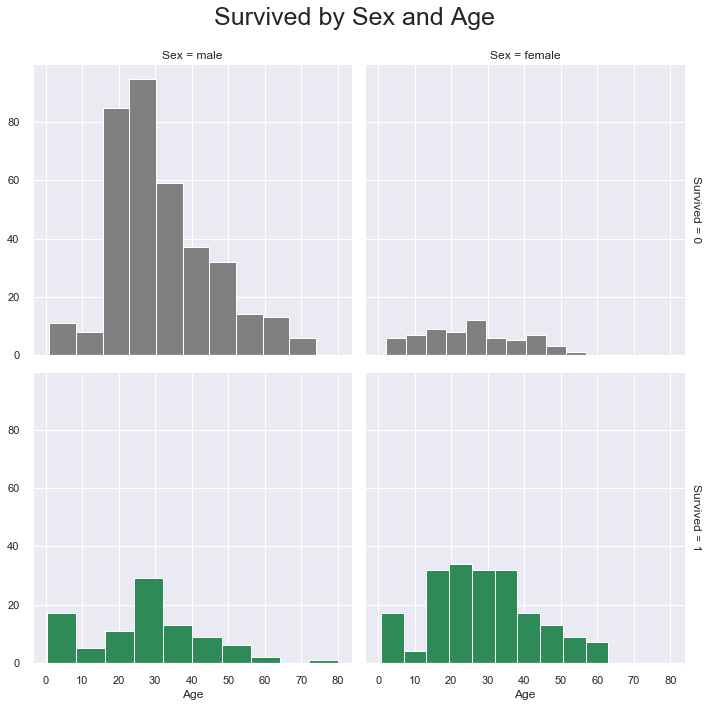

In [34]:
pal = {1: 'seagreen', 0: 'gray'}
g = sns.FacetGrid(train, size=5, col='Sex', row='Survived', margin_titles=True, hue='Survived', palette=pal)
g = g.map(plt.hist, 'Age', edgecolor='white')
g.fig.suptitle('Survived by Sex and Age', size=25)
plt.subplots_adjust(top=0.9)

Facetgrid is a great way to visualize multiple variables and their relationships at once. From the chart in section 3a we have a intuation that female passengers had better prority than males during the tragedy. However, from this facet grid, we can also understand which age range groups survived more than others or were not so lucky

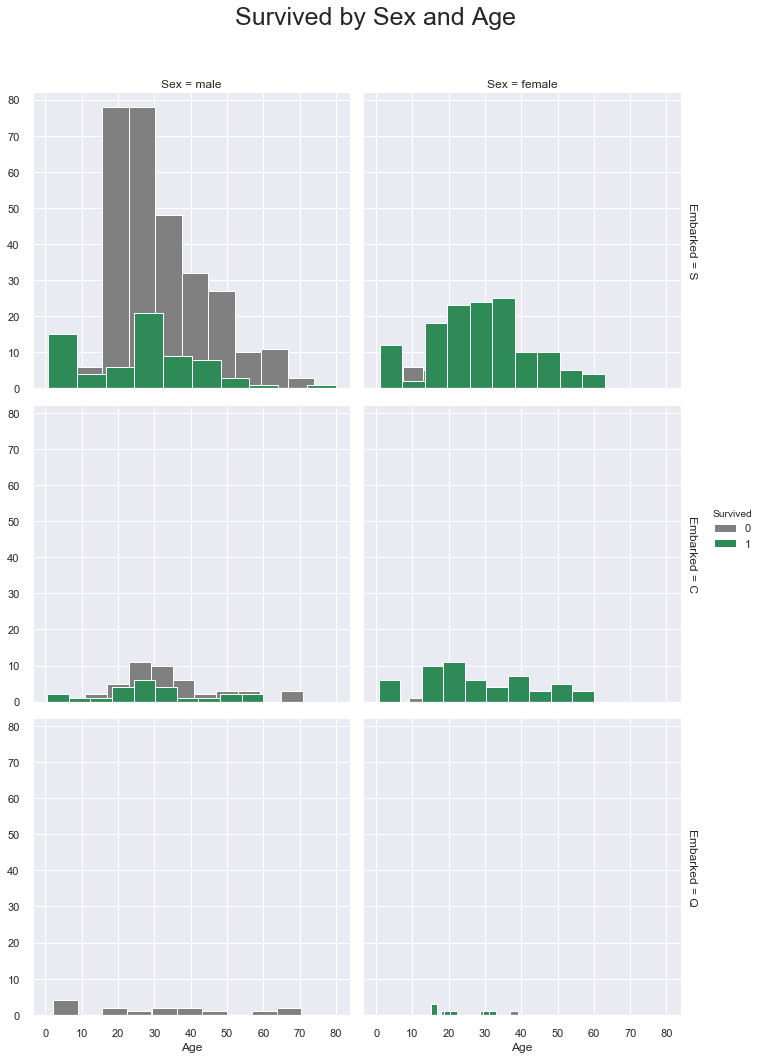

In [35]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

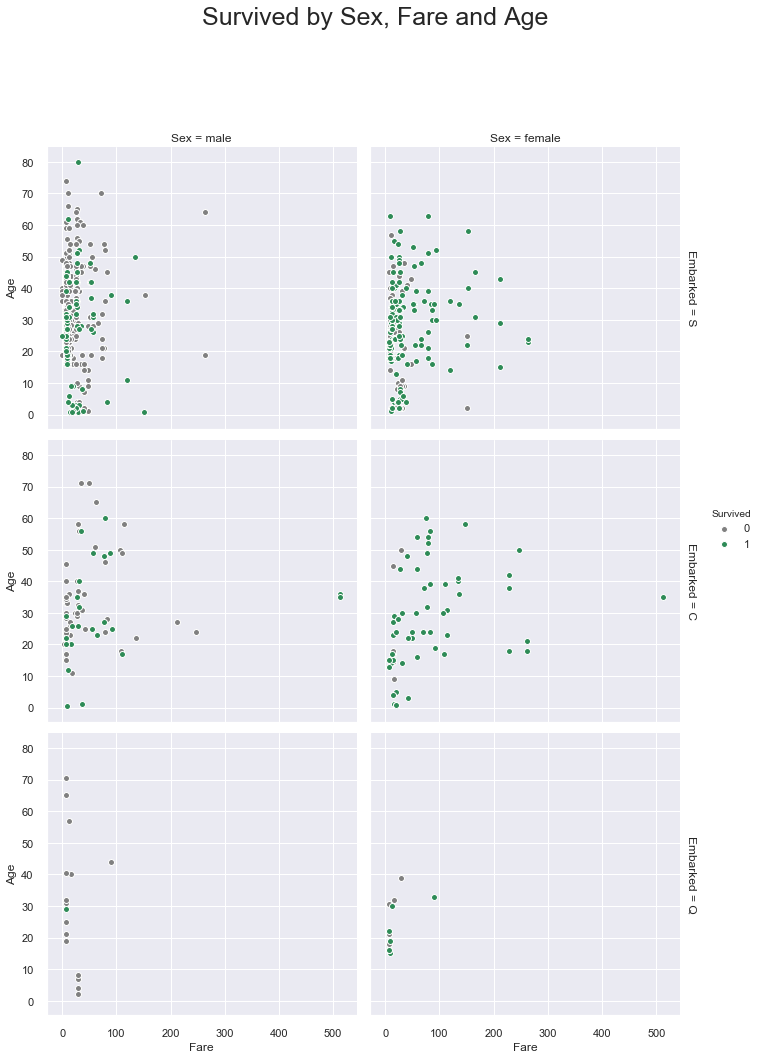

In [36]:
g = sns.FacetGrid(train, size=5, hue='Survived', col='Sex', row='Embarked', margin_titles=True, palette=pal)
g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()
g.fig.suptitle('Survived by Sex, Fare and Age', size=25)
plt.subplots_adjust(top=0.85)

# Statistical Learning

In [37]:
survived_summary = train.groupby('Survived').mean().reset_index()
survived_summary

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [38]:
train.groupby('Sex').mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,female,431.028662,2.159236,27.915709,0.694268,0.649682,44.479818,0.742038
1,male,454.147314,2.389948,30.726645,0.429809,0.235702,25.523893,0.188908


In [39]:
train.groupby('Pclass').mean().reset_index()

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
0,1,461.597222,38.233441,0.416667,0.356481,84.154687,0.629630
1,2,445.956522,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,25.140620,0.615071,0.393075,13.675550,0.242363


In [40]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


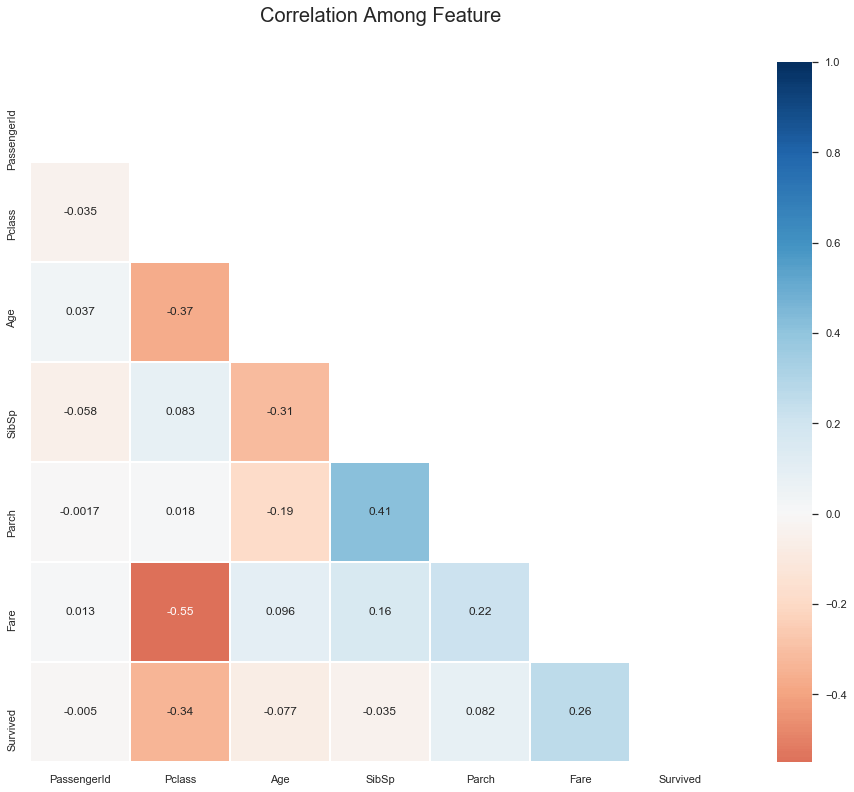

In [41]:
### heatmap to see the correlation between features.
# Generate a mask for the upper triangel (taken from seaborn gallery)

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize=(15, 12))
sns.heatmap(train.corr(),
            annot=True,
           mask = mask, 
           cmap = 'RdBu',
           linewidths =.9,
           linecolor = 'white',
           fmt = '.2g',
           center = 0,
           square = True)
plt.title('Correlation Among Feature', y = 1.03, fontsize = 20, pad = 40)
plt.show()

Hypothesis testing for Titanic¶

Formulating a well developed researched question:
Regarding this dataset, we can formulate the null hypothesis and alternative hypothesis by asking the following questions.

Is there a significant difference in the mean sex between the passenger who survived and passenger who did not survive?.
Is there a substantial difference in the survival rate between the male and female passengers?

--------------
Null Hypothesis(H0): 

male mean is greater or equal to female mean.

Alternative Hypothesis(H1): 

male mean is less than female mean.

In [42]:
import dc_stat_think as dcst

In [43]:
train['Sex'].replace('male', '0', inplace=True)

In [44]:
train['Sex'].replace('female', '1', inplace=True)

In [45]:
test['Sex'].replace('male', '0', inplace=True)
test['Sex'].replace('female', '1', inplace=True)

In [46]:
train['Sex'].astype('int')

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [47]:
male_reps = np.random.choice(train[train['Sex'] == '0']['Survived'].values, len(train[train['Sex'] == '0']['Survived'].values))

In [48]:
reps = dcst.draw_bs_reps(male_reps, np.mean, 10000)

In [49]:
reps.mean()

0.18739220103986134

In [50]:
female_reps = np.random.choice(train[train['Sex'] == '1']['Survived'].values, len(train[train['Sex'] == '1']['Survived'].values))

In [51]:
reps_1 = dcst.draw_bs_reps(female_reps, np.mean, 10000)
reps_1.mean()

0.7293738853503184

In [52]:
np.percentile(reps, [2.5, 97.5])

array([0.1559792 , 0.22010399])

In [53]:
reps_np.percentile(reps_1, [2.5, 97.5])

NameError: name 'reps_np' is not defined

In [54]:
np.sum(reps >= reps_1)/10000

0.0

In [ ]:
plt.hist(reps, color='r', linestyle=None)
plt.show()

In [ ]:
plt.hist(reps_1, color='b', linestyle=None)
plt.show()

# Feature Engineering

In [55]:
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <= 20):
        a = 'short'
    elif (size <= 35):
        a = 'medium'
    elif (size <= 45):
        a = 'good'
    else:
        a = 'long'
    return a

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

In [ ]:
train['title'] = [x.split('.')[0].split(',')[1].strip() for x in train.Name]
train.title.unique()


In [58]:
## Let's replace some of the rare values with the keyword 'rare' and other word choice of our own. 
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]

In [66]:
test['title'] = [x.split('.')[0].split(',')[1].strip() for x in test.Name]

In [67]:
def name_converted(i):
    name = ''
    if i in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        name = 'rare'
    elif i in ['Ms', 'Mile']:
        name = 'Miss'
    elif i == 'Mme':
        name = 'Mr'
    else:
        name = i
    return name

test.title = test.title.map(name_converted)
train.title = train.title.map(name_converted)

In [ ]:
tri

### Fare

In [72]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [73]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#### Family size

In [69]:
## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [70]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [71]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

In [74]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].apply(family_group)
test['family_group'] = test['family_size'].map(family_group)

In [75]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

In [77]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

### Age

In [78]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [96]:
test.Age.isnull().sum()

86

In [98]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## getting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = float(predicted_age)
    

    return df

## Implementing the completing_age function in both train and test dataset. 
# completing_age(train)
completing_age(test)

ValueError: could not convert string to float: 'A/4 48871'

In [ ]:
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = True, norm_hist=False);

# Preprocessing Model

In [100]:
X = train.drop(['Survived'], axis=1).values
y = train['Survived'].values

In [101]:
# importing library train_test_split for separating your data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

### Feature scaling

In [102]:
headers = train.drop(['Survived'], axis=1).columns

In [103]:
# feature scaling modules
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming X_train
X_train = st_scale.fit_transform(X_train)
## transforming X_test
X_test = st_scale.fit_transform(X_test)

# Modeling the Data

In [104]:
# import logisticRegression model in python

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

## call on the model object
logreg = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

## fit the model with "train_x" and "train_y"

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [106]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,154,21
Survived,28,92


In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8338983050847457

In [108]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7666666666666667

In [109]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       175
           1       0.81      0.77      0.79       120

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.83       295
weighted avg       0.83      0.83      0.83       295



Confusion matrix, without normalization
[[154  21]
 [ 28  92]]
Normalized confusion matrix
[[0.88 0.12]
 [0.23 0.77]]


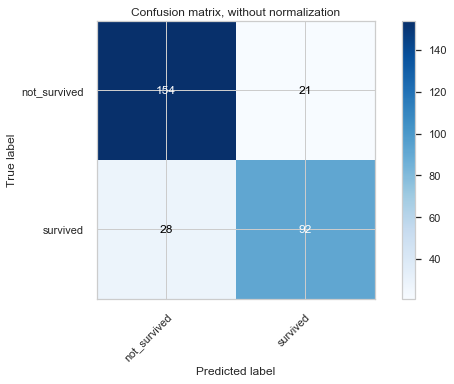

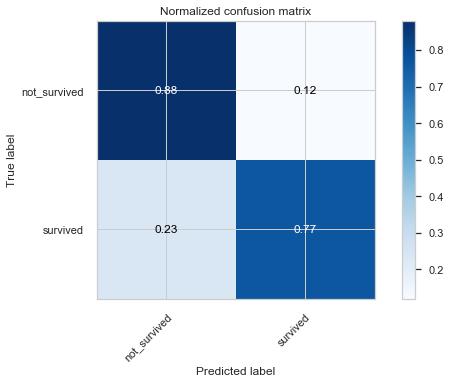

In [110]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

0.8789761904761904


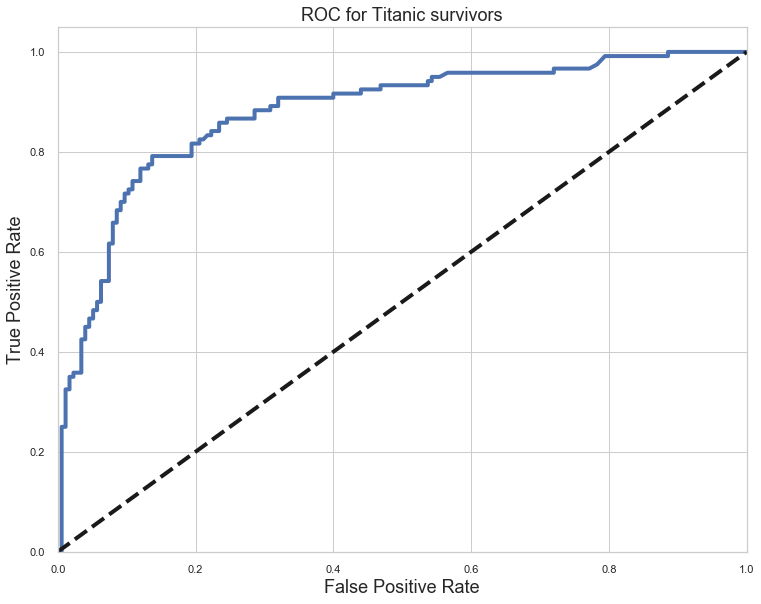

In [119]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

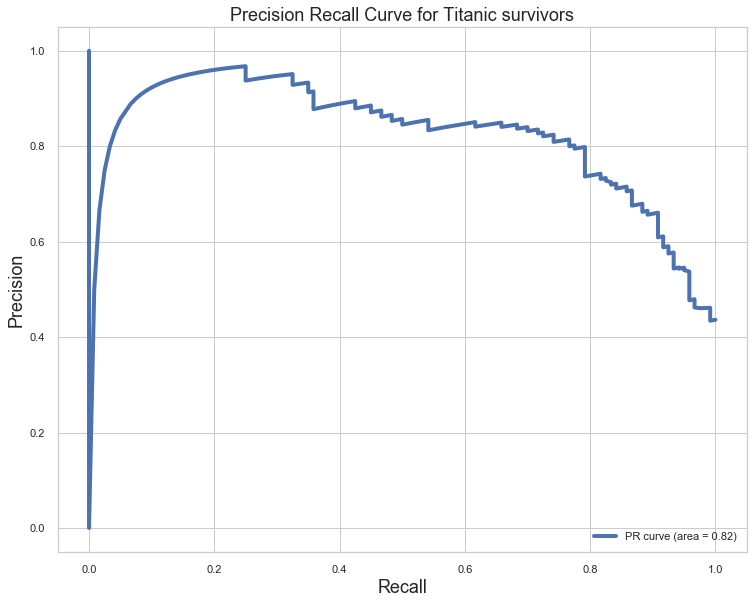

In [112]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [117]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X

# X = cv.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.81 0.83 0.82 0.86 0.83 0.81 0.82 0.87 0.83 0.83]
Mean Cross-Validation accuracy score: 0.8296


### GridSearch on Logistic Regression